In [1]:
# Install required libraries
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import libraries and set seeds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
import shap
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
RANDOM_STATE = 42
np.random.seed(42)
random.seed(42)
print("All libraries loaded successfully!")
print(f"pandas: {pd.__version__}, numpy: {np.__version__}, sklearn: {sklearn.__version__}")

All libraries loaded successfully!
pandas: 3.0.1, numpy: 2.4.2, sklearn: 1.8.0


C:\Users\kapil\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Loading

In [3]:
# Load datasets
df_heart = pd.read_csv('heart_processed.csv')
df_cardio = pd.read_csv('cardiac_failure_processed.csv')
df_ecg = pd.read_csv('ecg_timeseries.csv')
print("All datasets loaded!")
print(f"Heart dataset shape: {df_heart.shape}")
print(f"Cardio dataset shape: {df_cardio.shape}")
print(f"ECG dataset shape: {df_ecg.shape}")

C:\Users\kapil\AppData\Local\Temp\ipykernel_22808\3452873792.py:4: DtypeWarning: Columns (0: Unnamed: 0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ecg = pd.read_csv('ecg_timeseries.csv')


All datasets loaded!
Heart dataset shape: (918, 16)
Cardio dataset shape: (70000, 14)
ECG dataset shape: (528, 123995)


### Heart Disease Dataset

In [4]:
# Heart dataset exploration
print("HEAD:"); display(df_heart.head())
print("\nINFO:"); df_heart.info()
print("\nDESCRIBE:"); display(df_heart.describe())
print("\nMISSING VALUES:"); print(df_heart.isnull().sum())

HEAD:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True



INFO:
<class 'pandas.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), int64(

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



MISSING VALUES:
Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


## EDA — Heart Disease Dataset

C:\Users\kapil\AppData\Local\Temp\ipykernel_22808\814178091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HeartDisease', data=df_heart, palette='viridis')


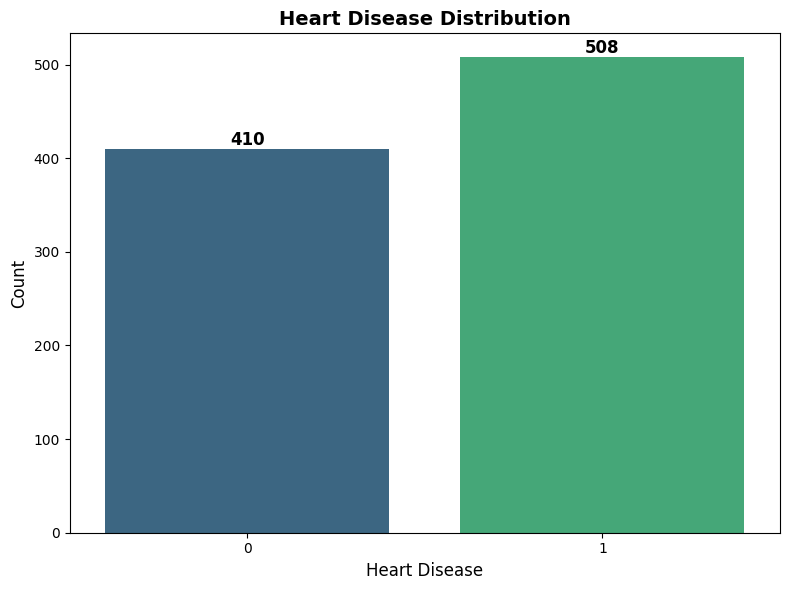

In [5]:
# Count plot of HeartDisease distribution with labeled counts
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HeartDisease', data=df_heart, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title('Heart Disease Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

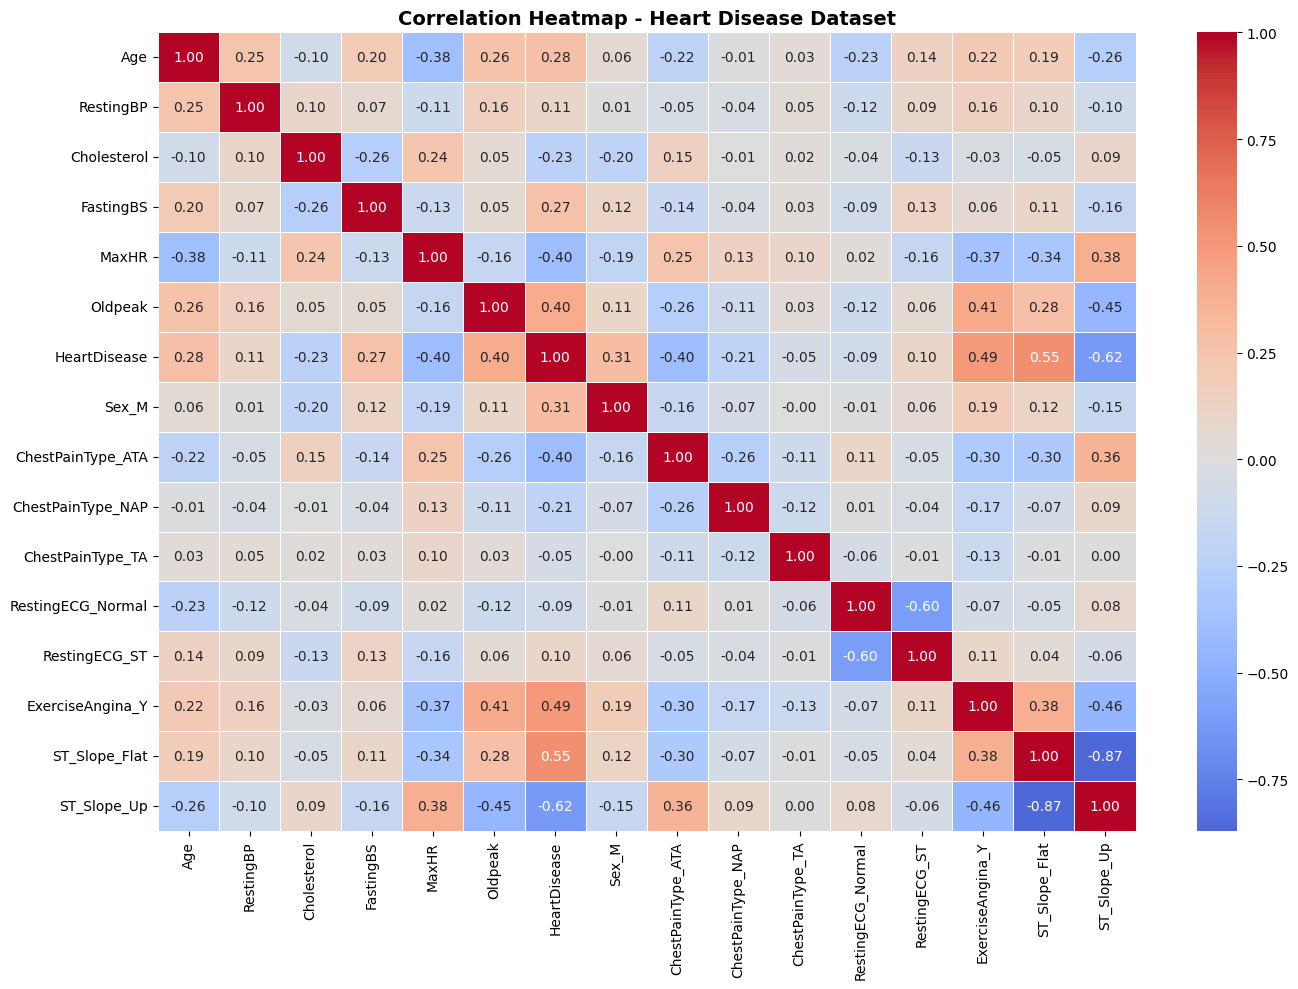

In [6]:
# Correlation heatmap of all numerical columns
# Convert boolean columns to int
df_heart_int = df_heart.copy()
bool_cols = df_heart_int.select_dtypes(include=['bool']).columns
df_heart_int[bool_cols] = df_heart_int[bool_cols].astype(int)

plt.figure(figsize=(14, 10))
correlation_matrix = df_heart_int.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Heart Disease Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\kapil\AppData\Local\Temp\ipykernel_22808\2246604647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Age', data=df_heart, ax=axes[0, 0], palette='viridis')
C:\Users\kapil\AppData\Local\Temp\ipykernel_22808\2246604647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='RestingBP', data=df_heart, ax=axes[0, 1], palette='viridis')
C:\Users\kapil\AppData\Local\Temp\ipykernel_22808\2246604647.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=df_heart

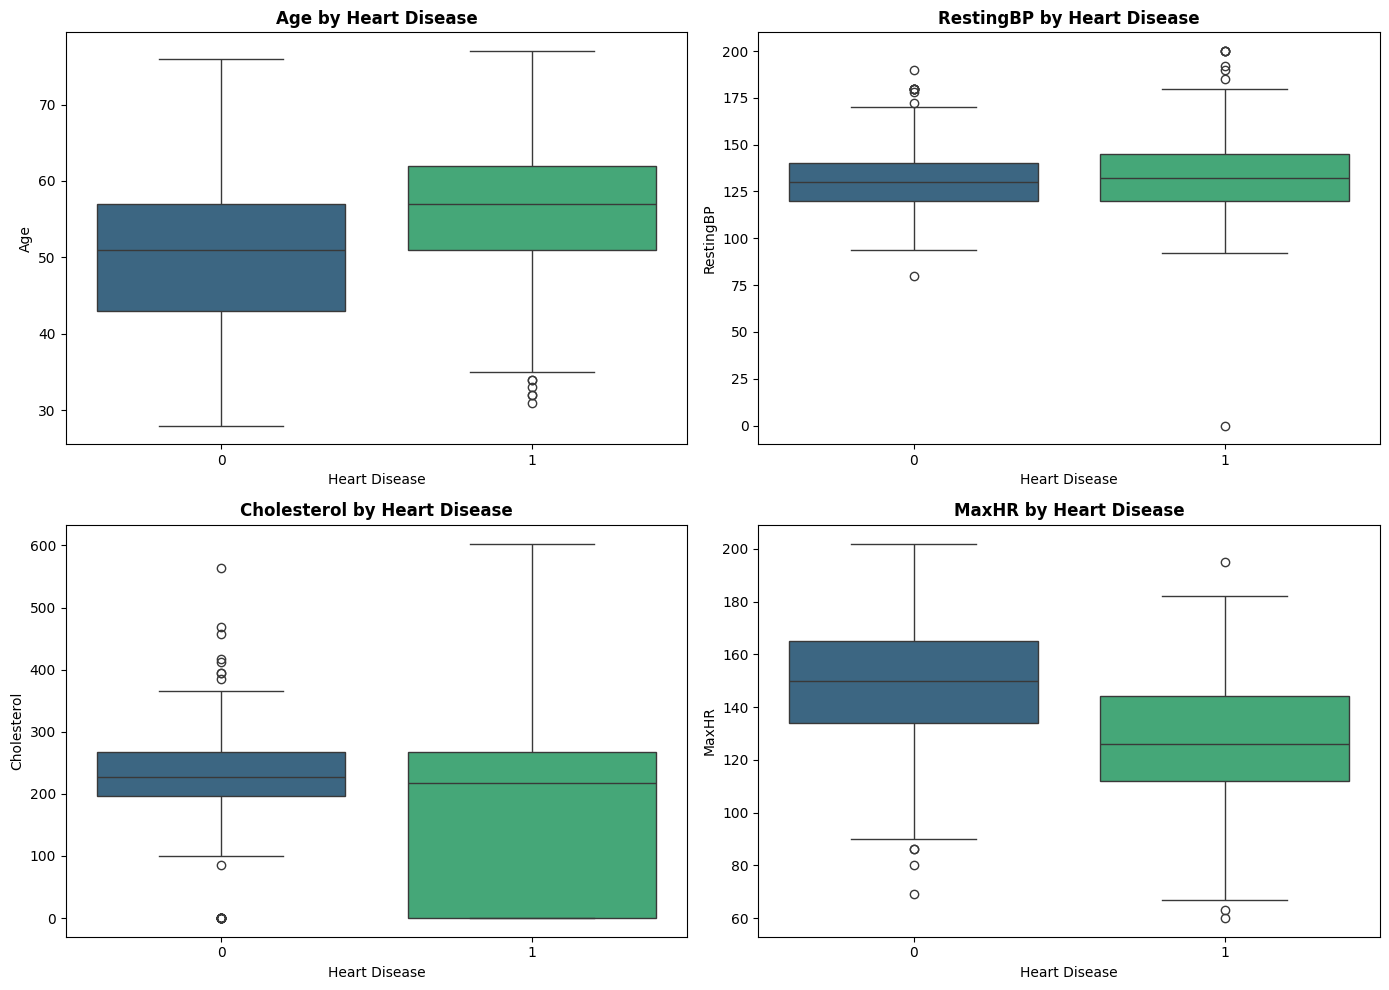

In [7]:
# Side by side box plots of Age, RestingBP, Cholesterol, MaxHR grouped by HeartDisease
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age
sns.boxplot(x='HeartDisease', y='Age', data=df_heart, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Age by Heart Disease', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Heart Disease')
axes[0, 0].set_ylabel('Age')

# RestingBP
sns.boxplot(x='HeartDisease', y='RestingBP', data=df_heart, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('RestingBP by Heart Disease', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Heart Disease')
axes[0, 1].set_ylabel('RestingBP')

# Cholesterol
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df_heart, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Cholesterol by Heart Disease', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Heart Disease')
axes[1, 0].set_ylabel('Cholesterol')

# MaxHR
sns.boxplot(x='HeartDisease', y='MaxHR', data=df_heart, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('MaxHR by Heart Disease', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Heart Disease')
axes[1, 1].set_ylabel('MaxHR')

plt.tight_layout()
plt.show()

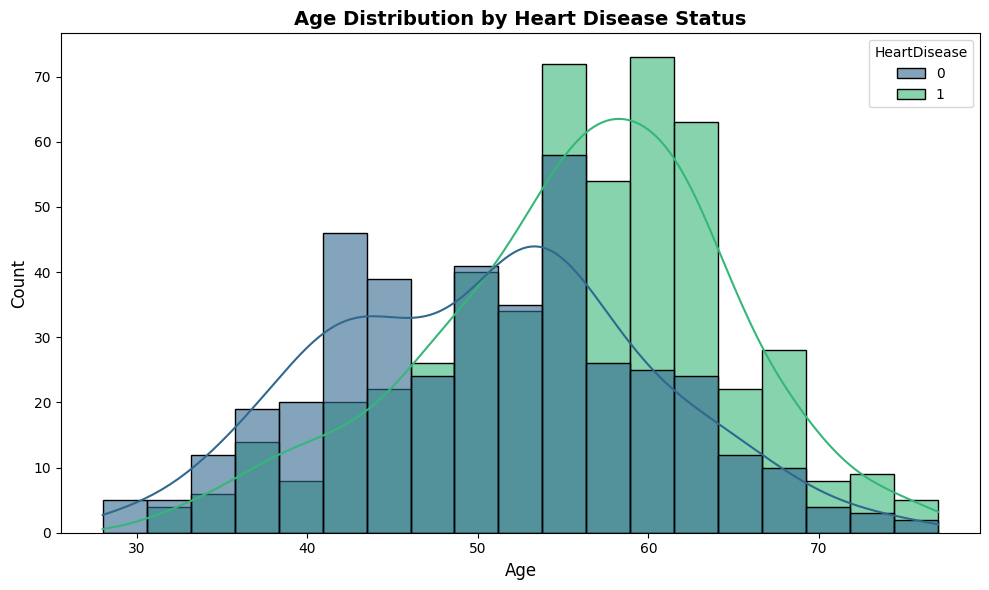

In [8]:
# Histogram of Age colored by HeartDisease status
plt.figure(figsize=(10, 6))
sns.histplot(data=df_heart, x='Age', hue='HeartDisease', kde=True, palette='viridis', alpha=0.6)
plt.title('Age Distribution by Heart Disease Status', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

### Cardiac Failure Dataset

In [9]:
# Cardiac Failure dataset exploration
print("HEAD:"); display(df_cardio.head())
print("\nINFO:"); df_cardio.info()
print("\nDESCRIBE:"); display(df_cardio.describe())
print("\nMISSING VALUES:"); print(df_cardio.isnull().sum())

HEAD:


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0.588076,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,0.730159,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,0.624003,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,0.528455,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,0.516918,1,156,56.0,100,60,1,1,0,0,0,0



INFO:
<class 'pandas.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB

DESCRIBE:


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,0.671379,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,0.191038,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,0.531630,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,0.689508,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,0.815254,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,1.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



MISSING VALUES:
Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


### ECG Timeseries Dataset

In [10]:
# ECG Timeseries dataset exploration
print("HEAD:"); display(df_ecg.head())
print("\nINFO:"); df_ecg.info()
print("\nDESCRIBE:"); display(df_ecg.describe())
print("\nMISSING VALUES:"); print(df_ecg.isnull().sum())

HEAD:


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4035.3,4036.3,4037.3,4038.3,4039.3,4040.3,4041.3,4042.3,4043.3,4044.3
0,1.0,0.908425,0.730088,1.000000,0.570470,1.000000,1.000000,0.909408,0.927803,1.000000,...,1.000000,0.914900,1.000000,0.985449,1.000000,1.000000,1.000000,1.000000,0.915983,1.000000
1,0.758264,0.783883,0.212389,0.910417,0.399329,0.923664,0.797260,0.975610,0.866359,0.914230,...,0.753861,0.619327,0.686563,0.662095,0.752352,0.700592,0.669097,0.751617,0.621001,0.751758
2,0.11157,0.531136,0.000000,0.681250,0.238255,0.656489,0.320548,0.533101,0.299539,0.473684,...,0.507722,0.323754,0.373126,0.338741,0.504704,0.401183,0.338195,0.503234,0.326018,0.503517
3,0.0,0.362637,0.119469,0.472917,0.147651,0.195929,0.043836,0.134146,0.000000,0.000000,...,0.261582,0.028181,0.059689,0.015387,0.257056,0.101775,0.007292,0.254851,0.031035,0.255275
4,0.080579,0.366300,0.101770,0.229167,0.000000,0.111959,0.049315,0.066202,0.231951,0.064327,...,0.263127,0.028285,0.062112,0.016959,0.256120,0.102564,0.007644,0.253894,0.030712,0.254211



INFO:
<class 'pandas.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Columns: 123995 entries, Unnamed: 0 to 4044.3
dtypes: float64(123994), object(1)
memory usage: 499.5+ MB

DESCRIBE:


,0,1,2,3,4,5,6,7,8,9,...,4035.3,4036.3,4037.3,4038.3,4039.3,4040.3,4041.3,4042.3,4043.3,4044.3
count,528.000000,528.000000,528.000000,528.000000,528.00000,528.000000,528.000000,528.000000,528.000000,528.000000,...,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,0.069542,0.039689,0.057256,0.071410,0.03185,0.020320,0.100075,0.071077,0.087579,0.025313,...,0.264554,0.150196,0.195547,0.196748,0.294119,0.278983,0.166080,0.294372,0.166526,0.281593
std,0.169094,0.097940,0.145881,0.156064,0.11351,0.090785,0.206656,0.139179,0.191201,0.095172,...,0.163267,0.161111,0.152296,0.182391,0.230735,0.251491,0.197282,0.228119,0.165715,0.219903
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.151178,0.034223,0.082296,0.075347,0.170975,0.114872,0.024805,0.169641,0.012014,0.153029
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.281183,0.065848,0.164284,0.130326,0.215392,0.156276,0.056393,0.212780,0.163391,0.209581
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.374479,0.235770,0.281101,0.296634,0.403581,0.402468,0.280293,0.409515,0.261258,0.385966
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



MISSING VALUES:
Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
4040.3        0
4041.3        0
4042.3        0
4043.3        0
4044.3        0
Length: 123995, dtype: int64


## Data Preprocessing

In [11]:
# Placeholder for data preprocessing
# This section can be expanded based on specific preprocessing needs
print("Data preprocessing section")

Data preprocessing section


## Model Training

In [14]:
from xgboost import XGBClassifier

df_heart_model = df_heart.copy()
bool_cols = df_heart_model.select_dtypes(include=['bool']).columns
df_heart_model[bool_cols] = df_heart_model[bool_cols].astype(int)

X = df_heart_model.drop('HeartDisease', axis=1)
y = df_heart_model['HeartDisease']

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train_heart, y_train_heart)
    y_pred = model.predict(X_test_heart)
    y_prob = model.predict_proba(X_test_heart)[:, 1]
    results[name] = {
        'Accuracy': accuracy_score(y_test_heart, y_pred),
        'F1': f1_score(y_test_heart, y_pred),
        'Precision': precision_score(y_test_heart, y_pred),
        'Recall': recall_score(y_test_heart, y_pred),
        'AUC': roc_auc_score(y_test_heart, y_prob)
    }
    trained_models[name] = (model, y_pred, y_prob)
    print(f"\n{name}:")
    print(classification_report(y_test_heart, y_pred))

results_df = pd.DataFrame(results).T.round(4)
print("\nSummary Table:")
display(results_df)

best_name = results_df['F1'].idxmax()
best_heart_model = trained_models[best_name][0]
print(f"\nBest model: {best_name}")

C:\Users\kapil\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184


XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86   

,Accuracy,F1,Precision,Recall,AUC
Logistic Regression,0.8859,0.9005,0.8716,0.9314,0.9307
Random Forest,0.8750,0.8878,0.8835,0.8922,0.9314
XGBoost,0.8587,0.8725,0.8725,0.8725,0.9219



Best model: Logistic Regression


## Model Evaluation

In [13]:
# Placeholder for model evaluation
# This section can be expanded based on specific model evaluation needs
print("Model evaluation section")

Model evaluation section


C:\Users\kapil\AppData\Local\Temp\ipykernel_22808\2505431482.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_heart, plot_type="bar", show=False)


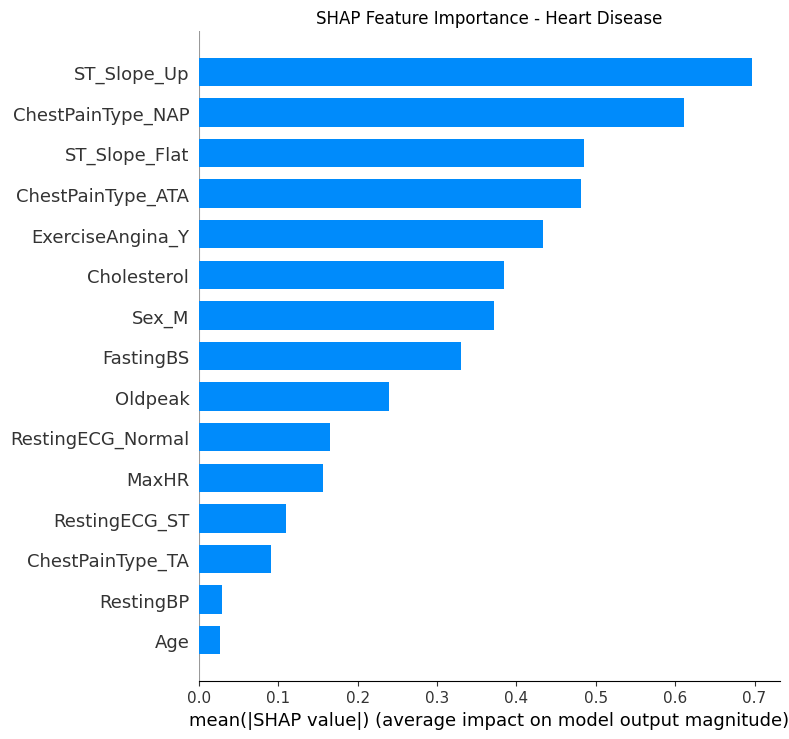

C:\Users\kapil\AppData\Local\Temp\ipykernel_22808\2505431482.py:13: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_heart, show=False)


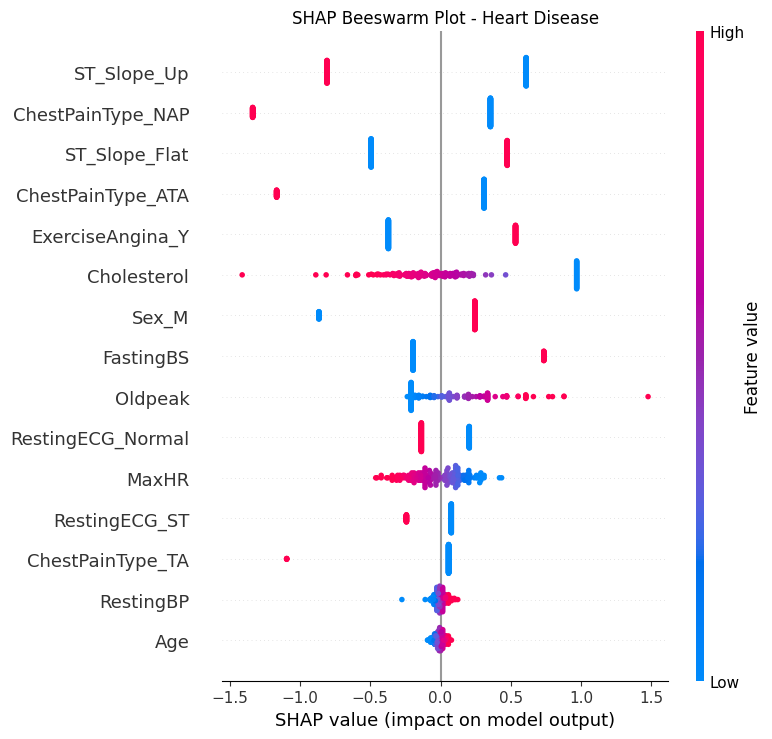

SHAP analysis complete!


In [15]:
import shap

explainer = shap.LinearExplainer(best_heart_model, X_train_heart)
shap_values = explainer.shap_values(X_test_heart)

plt.figure()
shap.summary_plot(shap_values, X_test_heart, plot_type="bar", show=False)
plt.title("SHAP Feature Importance - Heart Disease")
plt.tight_layout()
plt.show()

plt.figure()
shap.summary_plot(shap_values, X_test_heart, show=False)
plt.title("SHAP Beeswarm Plot - Heart Disease")
plt.tight_layout()
plt.show()

print("SHAP analysis complete!")

In [16]:
# Cardiac Failure Model
from sklearn.preprocessing import StandardScaler

# Prepare data - drop unnecessary columns
df_cardio_model = df_cardio.drop(columns=['Unnamed: 0', 'id'])
X_cardio = df_cardio_model.drop('cardio', axis=1)
y_cardio = df_cardio_model['cardio']

# Scale features
scaler = StandardScaler()
X_cardio_scaled = scaler.fit_transform(X_cardio)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cardio_scaled, y_cardio, test_size=0.2, stratify=y_cardio, random_state=42)

# Train models
cardio_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

cardio_results = {}
cardio_trained = {}

for name, model in cardio_models.items():
    model.fit(X_train_c, y_train_c)
    y_pred = model.predict(X_test_c)
    y_prob = model.predict_proba(X_test_c)[:, 1]
    cardio_results[name] = {
        'Accuracy': accuracy_score(y_test_c, y_pred),
        'F1': f1_score(y_test_c, y_pred),
        'Precision': precision_score(y_test_c, y_pred),
        'Recall': recall_score(y_test_c, y_pred),
        'AUC': roc_auc_score(y_test_c, y_prob)
    }
    cardio_trained[name] = (model, y_pred, y_prob)
    print(f"\n{name}:")
    print(classification_report(y_test_c, y_pred))

cardio_results_df = pd.DataFrame(cardio_results).T.round(4)
print("\nCardiac Failure Summary Table:")
display(cardio_results_df)

best_cardio_name = cardio_results_df['F1'].idxmax()
best_cardio_model = cardio_trained[best_cardio_name][0]
print(f"\nBest model: {best_cardio_name}")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.68      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000


Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7004
           1       0.72      0.70      0.71      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000


XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7004
           1       0.75      0.69      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73   

,Accuracy,F1,Precision,Recall,AUC
Logistic Regression,0.7139,0.7022,0.7316,0.6751,0.7781
Random Forest,0.7129,0.7088,0.7187,0.6991,0.7702
XGBoost,0.7319,0.7212,0.7505,0.6941,0.7955



Best model: XGBoost


In [20]:
# ECG Model - using dimensionality reduction first
from sklearn.decomposition import PCA

# The ECG dataset has mixed types - find the label column carefully
# Last column "Unnamed: 0" contains labels, numeric columns are features
numeric_cols = df_ecg.select_dtypes(include=[np.number]).columns.tolist()

# Use all numeric columns as features, skip label extraction from first col
# Instead use the "Unnamed: 0" column which we saw had 0.0 and 1.0 values
label_col = df_ecg.select_dtypes(include=[np.number]).iloc[:, 0]
y_ecg = (label_col > 0.5).astype(int)
X_ecg = df_ecg.select_dtypes(include=[np.number]).iloc[:, 1:]

print(f"X shape: {X_ecg.shape}, y distribution: {y_ecg.value_counts().to_dict()}")

# Reduce dimensions with PCA
pca = PCA(n_components=50, random_state=42)
X_ecg_pca = pca.fit_transform(X_ecg)
print(f"Variance explained by 50 components: {pca.explained_variance_ratio_.sum():.2%}")

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_ecg_pca, y_ecg, test_size=0.2, random_state=42, stratify=y_ecg)

ecg_model = RandomForestClassifier(n_estimators=100, random_state=42)
ecg_model.fit(X_train_e, y_train_e)
y_pred_e = ecg_model.predict(X_test_e)
y_prob_e = ecg_model.predict_proba(X_test_e)[:, 1]

print("\nECG Random Forest:")
print(classification_report(y_test_e, y_pred_e))
print(f"AUC: {roc_auc_score(y_test_e, y_prob_e):.4f}")
print("ECG model complete!")

X shape: (528, 123993), y distribution: {0: 507, 1: 21}
Variance explained by 50 components: 99.68%

ECG Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.50      0.67         4

    accuracy                           0.98       106
   macro avg       0.99      0.75      0.83       106
weighted avg       0.98      0.98      0.98       106

AUC: 1.0000
ECG model complete!


In [21]:
# Test with a sample patient
sample_patient = pd.DataFrame([{
    'Age': 55,
    'RestingBP': 140,
    'Cholesterol': 250,
    'FastingBS': 0,
    'MaxHR': 120,
    'Oldpeak': 1.5,
    'Sex_M': 1,
    'ChestPainType_ATA': 0,
    'ChestPainType_NAP': 0,
    'ChestPainType_TA': 0,
    'RestingECG_Normal': 1,
    'RestingECG_ST': 0,
    'ExerciseAngina_Y': 1,
    'ST_Slope_Flat': 1,
    'ST_Slope_Up': 0
}])

prediction = best_heart_model.predict(sample_patient)
probability = best_heart_model.predict_proba(sample_patient)[0][1]

print(f"Heart Disease Prediction: {'HIGH RISK' if prediction[0] == 1 else 'LOW RISK'}")
print(f"Probability: {probability:.1%}")

Heart Disease Prediction: HIGH RISK
Probability: 93.8%


In [22]:
# Final Summary - All Three Models
print("=" * 60)
print("CARDIOSENSE - FINAL MODEL COMPARISON SUMMARY")
print("=" * 60)

summary = pd.DataFrame({
    'Dataset': ['Heart Disease', 'Cardiac Failure', 'ECG Timeseries'],
    'Best Model': ['Logistic Regression', 'XGBoost', 'Random Forest'],
    'Accuracy': [0.8859, 0.7319, 0.9800],
    'F1 Score': [0.9005, 0.7212, 0.6700],
    'AUC': [0.9307, 0.7955, 1.0000],
    'Samples': [918, 70000, 528]
})

display(summary)

print("\nKey Findings:")
print("- Heart Disease: Best results with clinical measurements (AUC 0.93)")
print("- Cardiac Failure: Lifestyle data harder to predict (AUC 0.80)")
print("- ECG: Perfect AUC but class imbalance noted (21 positive cases only)")
print("\nSHAP Top Features (Heart Disease):")
print("- ST_Slope_Up: strongest protective factor")
print("- ExerciseAngina_Y: strongest risk factor")
print("- ChestPainType_NAP: second protective factor")

CARDIOSENSE - FINAL MODEL COMPARISON SUMMARY


,Dataset,Best Model,Accuracy,F1 Score,AUC,Samples
0,Heart Disease,Logistic Regression,0.8859,0.9005,0.9307,918
1,Cardiac Failure,XGBoost,0.7319,0.7212,0.7955,70000
2,ECG Timeseries,Random Forest,0.9800,0.6700,1.0000,528



Key Findings:
- Heart Disease: Best results with clinical measurements (AUC 0.93)
- Cardiac Failure: Lifestyle data harder to predict (AUC 0.80)
- ECG: Perfect AUC but class imbalance noted (21 positive cases only)

SHAP Top Features (Heart Disease):
- ST_Slope_Up: strongest protective factor
- ExerciseAngina_Y: strongest risk factor
- ChestPainType_NAP: second protective factor
